
# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.


>*●* Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

>*●*There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.

>*●* The final two columns ending with “ _adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time

For the analysis included in the notebook i choose to look at the following 2 questions:
>*●* which movies collected highest revenue

>*●* Is there any relationship between years and popularity




In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling





In [2]:
# Removed columns are homepage,tagline,imdb_id,keywords,overview
#changed release_date date type string to to_datetime
df_movie = pd.read_csv('tmdb-movies.csv')
df_movie.head(2)
df_movie.dtypes
df_movie['release_date']=pd.to_datetime(df_movie['release_date'])
df_movie.dtypes
df_movie.drop(['homepage','tagline','imdb_id','keywords','overview',],axis=1, inplace = True)
df_movie.head(4)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09


In [3]:
def sorted1(df):
    return df.sort_values(by = 'popularity',ascending = False)
def sorted2(df):
    return df.sort_values(by = 'revenue',ascending = False)
def slope(x_val,y_val):
    x = np.array(x_val)
    y = np.array(y_val)
    m=((np.mean(x)*np.mean(y))-np.mean(x*y)/((np.mean(x)*np.mean(x))-np.mean(x*x)))
    m = round(m,2)
    b = (np.mean(y)-np.mean(x)*m)
    b = round(b,2)
    return m,b




### Data Cleaning (Replace this with more specific notes!)

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df_movie.duplicated().sum()
df_movie.drop_duplicates(inplace=True)


In [5]:
df_movie.duplicated().any()

False

In [6]:
df_movie.isnull().sum()
df_movie.dropna(inplace=True)


In [7]:
df_movie.isnull().any()


id                      False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
director                False
runtime                 False
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

<a id='eda'></a>
## Exploratory Data Analysis



### Data Cleaning (Replace this with more specific notes!)

In [8]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
n2 = sorted1(df_movie)
n2
df_movie.sort_values(by = 'release_date')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10737,18118,0.386778,0,0,Mackenna's Gold,Gregory Peck|Omar Sharif|Camilla Sparv|Julie N...,J. Lee Thompson,128,Action|Western,Columbia Pictures,1969-01-01,17,6.2,1969,0.000000e+00,0.000000e+00
10748,5227,0.141056,0,0,Hercules in New York,Arnold Schwarzenegger|Deborah Loomis|Taina Elg...,Arthur Allan Seidelman,91,Action|Adventure|Comedy|Fantasy|Science Fiction,RAF Industries,1969-02-23,30,4.0,1969,0.000000e+00,0.000000e+00
10750,5179,0.130308,0,0,The Prime of Miss Jean Brodie,Maggie Smith|Robert Stephens|Pamela Franklin|C...,Ronald Neame,116,Drama,Twentieth Century-Fox Productions,1969-02-24,16,5.8,1969,0.000000e+00,0.000000e+00
10744,11574,0.214344,0,0,Support Your Local Sheriff,James Garner|Joan Hackett|Walter Brennan|Harry...,Burt Kennedy,92,Comedy|Western,Cherokee Productions|Three Pictures,1969-03-26,18,6.4,1969,0.000000e+00,0.000000e+00
10726,624,0.897684,360000,0,Easy Rider,Peter Fonda|Dennis Hopper|Antonio Mendoza|Phil...,Dennis Hopper,95,Action|Adventure|Crime|Drama,Raybert Productions|Pando Company Inc.,1969-05-07,186,6.6,1969,2.139935e+06,0.000000e+00
10727,3116,0.859806,3600000,44785053,Midnight Cowboy,Dustin Hoffman|Jon Voight|Sylvia Miles|John Mc...,John Schlesinger,113,Drama,United Artists|Florin Productions|Jerome Hellm...,1969-05-25,124,7.0,1969,2.139935e+07,2.662142e+08
10753,19307,0.021121,0,0,Carry On Camping,Sid James|Charles Hawtrey|Joan Sims|Kenneth Wi...,Gerald Thomas,88,Comedy,The Rank Organisation,1969-05-29,11,6.4,1969,0.000000e+00,0.000000e+00
10740,17529,0.311288,0,14250000,True Grit,John Wayne|Kim Darby|Jeremy Slate|Dennis Hoppe...,Henry Hathaway,128,Drama|Western|Adventure,Paramount Pictures,1969-06-11,98,7.0,1969,0.000000e+00,8.470576e+07
10749,55152,0.141028,175000,0,The Oblong Box,Vincent Price|Christopher Lee|Rupert Davies|Ut...,Gordon Hessler,91,Horror,American International Productions,1969-06-11,13,5.3,1969,1.040246e+06,0.000000e+00
10728,576,0.615889,6244087,638641,The Wild Bunch,Ernest Borgnine|William Holden|Robert Ryan|Edm...,Sam Peckinpah,145,Adventure|Western,Warner Brothers/Seven Arts,1969-06-17,121,7.2,1969,3.711650e+07,3.796251e+06


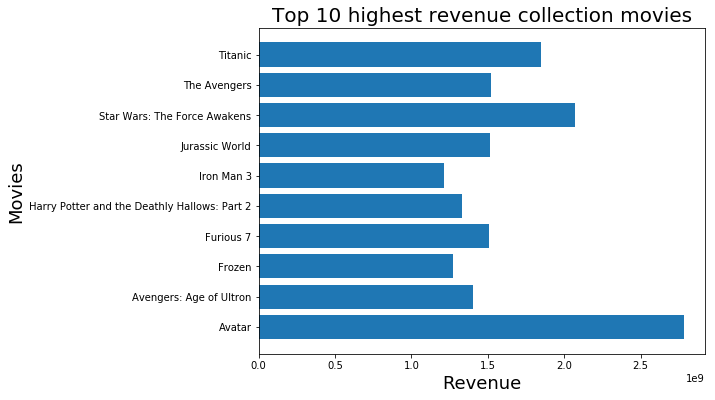

In [9]:
n3 = df_movie.query('revenue >=1215439994')
plt.figure(figsize=(8,6))
plt.barh(n3.original_title,n3.revenue)
plt.ylabel("Movies",fontsize = 18)
plt.xlabel('Revenue',fontsize = 18)
plt.title('Top 10 highest revenue collection movies',fontsize = 20)
plt.show()

<a id='conclusion'></a>

## Summary
**Top 10 highest revenue collection movies**:
 According to the bar graph, The Avatar movies collect the highest revenue of 2781505847, The Star Wars: The Force Awakens second highest collected in revenue of 2068178225,
In the top 10 revenue collection, the Iron man in the 10th position of collected revenue of 1215439994,
In the top 10 revenue collection, the Frozen in the 9th position of collected revenue of 1274219009.

## Name the top 10 popularity movies

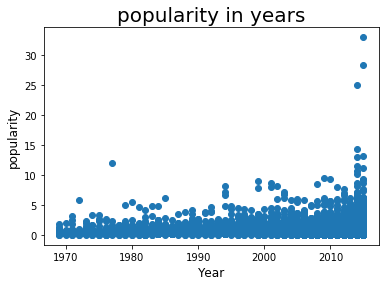

In [10]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate
n5 = df_movie.query('release_date >="1969-01-01" and release_date <="2018-12-30" ')
plt.scatter(n5.release_year,n5.popularity)
plt.xlabel('Year',fontsize = 12)
plt.ylabel('popularity',fontsize = 12)
plt.title('popularity in years',fontsize = 20)
#plt.plot(n5.release_year,n5.popularity)
#plt.plot(df_movie.release_year,df_movie.budget)
plt.show()



## Summary

>Above scatter plot tells that number of movies getting popular by year
in 1970 year popularity less compare with 2010

Text(0,0.5,'Frequency')

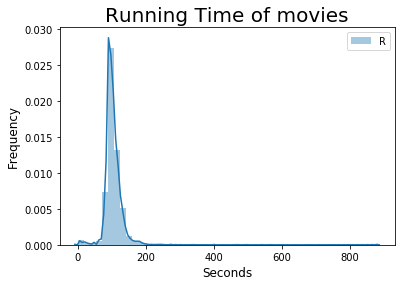

In [11]:
import seaborn as sns
sns.distplot(df_movie['runtime'])
plt.legend('Runtime')
plt.title('Running Time of movies',fontsize = 20)
plt.xlabel('Seconds',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)

## Summary

>Most of movies runtime is 114.6 by showed above hist plot

Text(32.0938,0.5,'Columns')

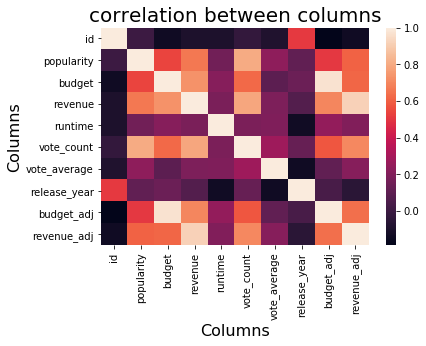

In [12]:
n=df_movie.corr()
sns.heatmap(n)
plt.title("correlation between columns",fontsize = 20)
plt.xlabel('Columns',fontsize = 16)
plt.ylabel('Columns',fontsize = 16)

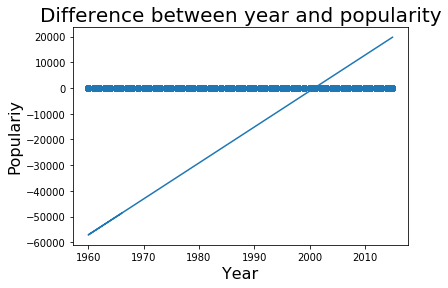

In [13]:
slope(df_movie.release_year,df_movie.popularity)
m,b = slope(df_movie.release_year,df_movie.popularity)
reg_line = [((m*x)*1)+b for x in df_movie.release_year ]
plt.scatter(df_movie.release_year,df_movie.popularity)
plt.title('Difference between year and popularity',fontsize = 20)
plt.xlabel('Year',fontsize = 16)
plt.ylabel('Populariy',fontsize = 16)
plt.plot(df_movie.release_year,reg_line)

<a id='conclusions'></a>
## Conclusions
After performing the analysis if we want to make any successful movie we will be using formula.

>'●' Runtime: Runtime of the movie should 114.6

>'●' Budget: of movie should be around 66.52

>'●' Genre : Movie should have comedy as genre 

## Limitations

> By following above formula we have a high probability of making profitable and successful movie but it's not completely true as data provided might have some errors and as we have seen in our exploration the budget, and revenue column had many erroneous zero values which would have definitely affected our analysis whereas draping rows with missing values could have an effect on our overall analysis, and also they don't have currency unit as movies might have made in different countries which could surely affect our analysis we have to apply some sort of normal... to triumph over. And also we don't know.out how Me ...counts' are taken a. popularity is computed these could depend on the different mediums through which it had been concluded, and also Mere could be some influential factors that we should take care of. 

In [14]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0